In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random as rand

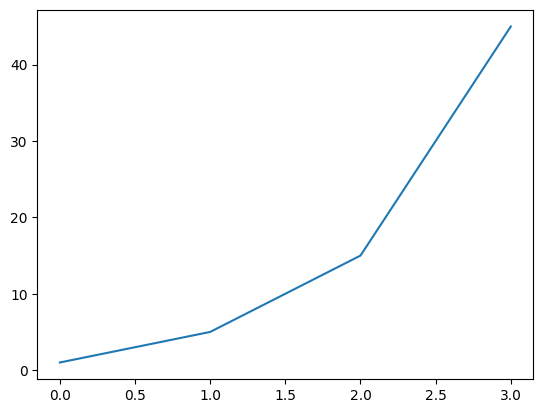

In [6]:
plt.plot([1, 5, 15, 45])

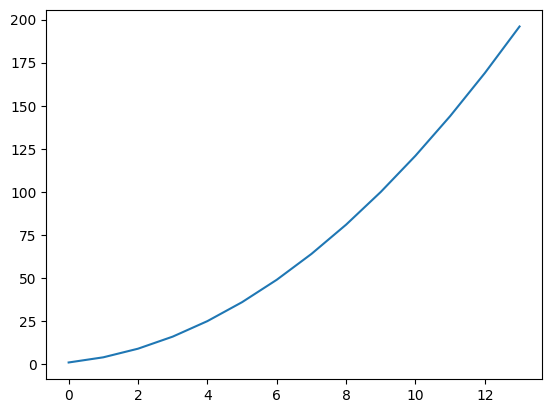

In [19]:
y = [x**2 for x in range(1, 15)]
plt.plot(y)

In [26]:
y = pd.DataFrame({"x": [1, 2, 3], "y": [2, 4, 6]})

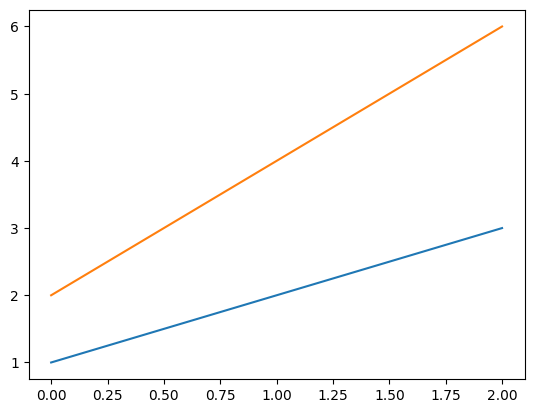

In [28]:
plt.plot(y)

In [30]:
data = [x * 10 for x in range(10)]
labels = [f"{x}!" for x in range(10)]

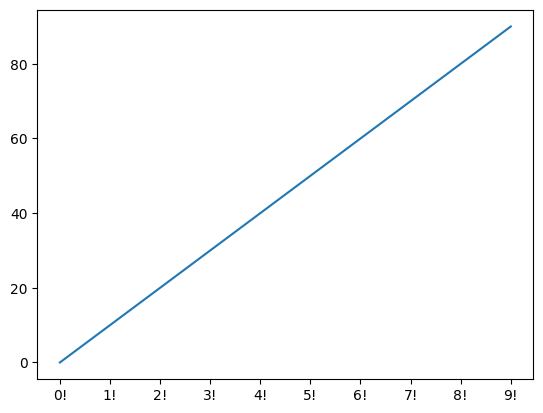

In [32]:
# when not using jupyter notebooks to get a plot to show up we will need to get plt.show()
plt.plot(labels, data)
plt.show()  # adding plt.show() will also get rid of the jupyter output text

In [36]:
df = pd.DataFrame(data, labels).assign(series2=lambda x: x[0] / 2)
df.head()

,0,series2
0!,0,0.0
1!,10,5.0
2!,20,10.0
3!,30,15.0
4!,40,20.0


Text(0.5, 1.0, 'Chart Title')

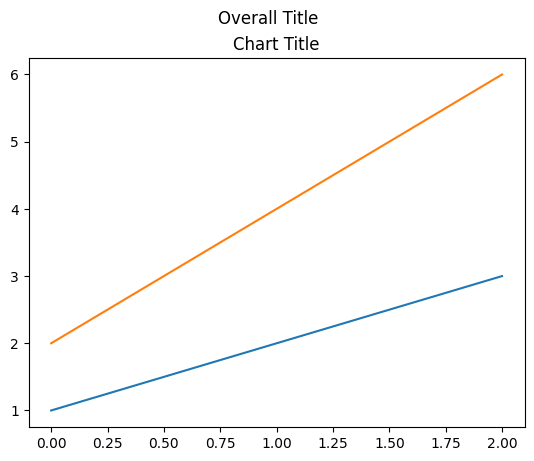

In [38]:
# object oriented plotting

# create the empty canvas
fig, ax = plt.subplots()
# call to plot
ax.plot(y)
# create title for the "figure" and for the "axis"
fig.suptitle("Overall Title")
ax.set_title("Chart Title")

Text(0.5, 0.98, 'Overall Title')

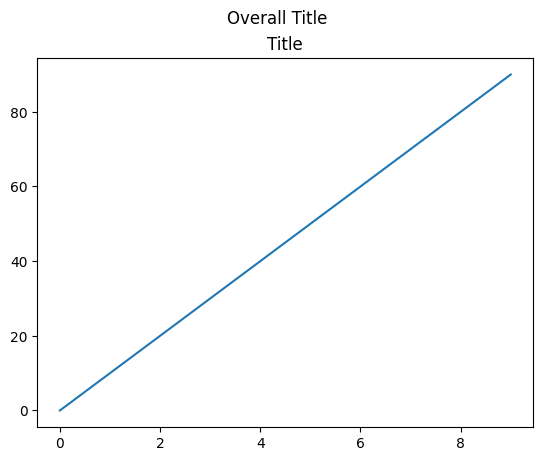

In [41]:
fig, ax = plt.subplots()

ax.plot(data)
fig.suptitle("Overall Title")
ax.set_title("Title")

When plotting DataFrames using the Object-Oriented interface, Matplotlib will use the index as the x_axis and plot each column as a separate series by default

Text(0.5, 1.0, 'Product Sales and Profits')

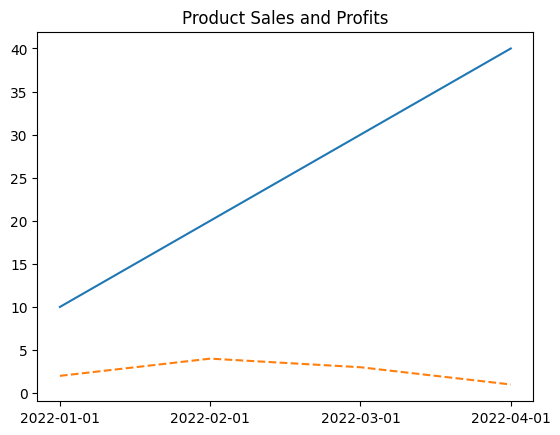

In [54]:
data_dict = {
    "Sales": [10, 20, 30, 40],
    "Profits": [2, 4, 3, 1],
    "Date": ["2022-01-01", "2022-02-01", "2022-03-01", "2022-04-01"],
}

df = pd.DataFrame(data_dict, columns=["Sales", "Profits"], index=data_dict["Date"])

fig, ax = plt.subplots()

ax.plot(df.index, df["Sales"])
ax.plot(df.index, df["Profits"], ls="--")

ax.set_title("Product Sales and Profits")

In [59]:
df = pd.read_excel(
    "C:/Users/zzbinden/zzit/RepoMan/udemy/data/HotelCustomersDataset.xlsx"
)
df.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
date = pd.to_datetime("2018-12-31")

df["Date"] = date - pd.to_timedelta(df["DaysSinceCreation"], unit="d")

df["Date"] = df["Date"].astype("datetime64[ns]")

In [68]:
df.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,Date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


In [75]:
daily_revenue = df.groupby("Date").agg({"LodgingRevenue": "sum", "OtherRevenue": "sum"})

monthly_revenue = daily_revenue.resample("ME").sum()

In [76]:
monthly_revenue.head()

,LodgingRevenue,OtherRevenue
Date,,
2016-01-31,124531.34,52190.50
2016-02-29,131689.12,51203.13
2016-03-31,443476.86,127336.11
2016-04-30,500966.80,145228.87
2016-05-31,634200.17,143359.35


Text(0.5, 1.0, 'Lodging Revenue vs Other Revenue per Year')

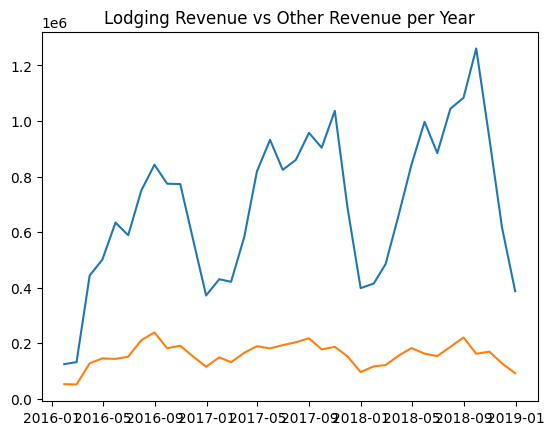

In [77]:
fig, ax = plt.subplots()

ax.plot(monthly_revenue.index, monthly_revenue["LodgingRevenue"])
ax.plot(monthly_revenue.index, monthly_revenue["OtherRevenue"])

ax.set_title("Lodging Revenue vs Other Revenue per Year")

In [123]:
rand.randint(1, 5)

nums1 = [1, 2, 3, 0, 0]
nums2 = [2, 5, 6]

test += nums2


def sort(nums=list[int]):
    if len(nums) <= 1:
        return nums
    pivot = nums[len(nums) // 2]
    left = [x for x in nums if x < pivot]
    middle = [x for x in nums if x == pivot]
    right = [x for x in nums if x > pivot]
    return sort(left) + middle + sort(right)


def merge(nums1: list[int], m: int, nums2=list[int], n=int) -> None:
    nums1[:] = [i for i in nums1 if i != 0]
    nums2[:] = [i for i in nums2 if i != 0]
    nums1 += nums2
    nums1[:] = sort(nums1)

In [124]:
nums1 = [1, 2, 3, 0, 0]
nums2 = [2, 5, 6]
merge(nums1=nums1, m=3, nums2=[2, 5, 6], n=3)

nums1

[1, 2, 2, 3, 5, 6]

In [105]:
nums1 = [1, 2, 3, 0, 0]
nums2 = [2, 5, 6]

nums1 += nums2

In [111]:
nums1 = [i for i in nums1 if i != 0]
nums1

[1, 2, 3, 2, 5, 6]

In [3]:
retail_df = pd.read_csv("../data/retail_2016_2017.csv")

In [5]:
retail_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [6]:
sales_array = np.array(retail_df["sales"])
family_array = np.array(retail_df["family"])

In [9]:
prod_sarray = sales_array[family_array == "PRODUCE"]

In [10]:
len(prod_sarray)

31968